<a href="https://colab.research.google.com/github/faranak5171/Data-Manipulation/blob/main/ClusteringSeeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# DataSet can be downloaded from https://archive.ics.uci.edu/ml/datasets/seeds

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [37]:
ds_seed = np.loadtxt("seeds_dataset.txt")
print(f"The range of values : [{ds_seed.min()} ,{ds_seed.max()}] So, before clustering we should normalize the data!")
train_ds, test_ds = train_test_split(ds_seed, test_size=0.2, shuffle=True, random_state=42)
print(f"The shape of Train ds: {train_ds.shape}, Test ds: {test_ds.shape}")

The range of values : [0.7651 ,21.18] So, before clustering we should normalize the data!
The shape of Train ds: (168, 8), Test ds: (42, 8)


In [38]:
inertias = []
clusters = range(1,6)
for k in clusters:
  model = KMeans(n_clusters = k)
  model.fit(train_ds)
  inertias.append(model.inertia_)

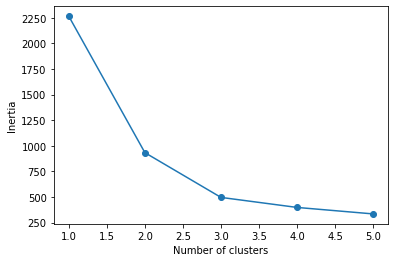

In [39]:
plt.plot(clusters, inertias, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [41]:
print("According to the Inertia plot, k=3 has lower inertia")

scaler = StandardScaler()
kmean = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmean)
pipeline.fit(train_ds)
labels = pipeline.predict(test_ds)
print(labels)

According to the Inertia plot, k=3 has lower inertia
[1 0 2 0 1 0 1 0 1 0 2 0 0 2 1 2 0 1 0 2 2 1 0 2 2 0 1 2 1 0 0 1 2 1 2 2 0
 2 2 0 0 0]
